In [739]:
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy

import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [740]:
round(random.random(),2)

0.14

In [741]:
random.randint(-10,10)

7

In [742]:
random.randrange(0,99,5)

95

In [743]:
random.uniform(-10,10)

0.8486506132839882

In [744]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.uniform(-90,90)
    latitudes.append(random_lat)
    x += 1

In [745]:
for x in latitudes:
    print(round(x,3))

-5.64
-85.04
57.085
-21.587
-43.114
-87.08
-64.603
-23.342
10.178
-87.456


In [746]:
x = 1
longitudes = []
while x < 11:
    random_long = random.uniform(-90,90)
    longitudes.append(random_long)
    x += 1

In [747]:
for x in longitudes:
    print(round(x,3))

42.308
-58.041
39.638
-36.446
59.467
27.41
28.278
-22.488
-63.27
70.422


In [748]:
%timeit np.random.uniform(low=-90, high=90, size=1500)

12.7 µs ± 579 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [749]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.uniform(-90,90)
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.

%timeit latitudes(1500)

462 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [750]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90,90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.

latitudes(5)

[-13.882025719426325,
 -6.708827271830277,
 33.7769152325676,
 83.11243494511962,
 -86.88482586850444]

In [751]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=2500)
longs = np.random.uniform(low=-90, high=90, size=2500)
latlongs = zip(lats, longs)
latlongs

In [752]:
# Add the latitudes and longitudes to a list.
coordinates = list(latlongs)
print(coordinates[:3])

[(-11.027725120830397, -44.59315151574876), (32.956933120814114, -29.47455180461195), (-10.551282030962724, 30.350889832112344)]


In [753]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    #city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

888

In [754]:
cities[:5]

['formosa do rio preto', 'ribeira grande', 'luwingu', 'hermanus', 'senneterre']

In [755]:
first_city = cities[0]
first_city

'formosa do rio preto'

In [756]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ed6207ebdf7a3629fda9718ad01bfb3&q="

In [757]:
query_url = url + first_city
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ed6207ebdf7a3629fda9718ad01bfb3&q=formosa do rio preto


In [758]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [759]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + cities[i]

In [760]:
cities

['formosa do rio preto',
 'ribeira grande',
 'luwingu',
 'hermanus',
 'senneterre',
 'kruisfontein',
 'taolanaro',
 'ostrovnoy',
 'bredasdorp',
 'saldanha',
 'nantucket',
 'atasu',
 'jamestown',
 'maceio',
 'tignere',
 'traiguen',
 'klaksvik',
 'illoqqortoormiut',
 'longyearbyen',
 'raciborz',
 'roald',
 'saint-philippe',
 'ushuaia',
 'hithadhoo',
 'bardiyah',
 'havelock',
 'cape town',
 'tsihombe',
 'bollnas',
 'sao filipe',
 'kibala',
 'cockburn town',
 'ahar',
 'qaanaaq',
 'port alfred',
 'offa',
 'barbastro',
 'inirida',
 'saint-joseph',
 'senanga',
 'grand river south east',
 'marystown',
 'mahebourg',
 'marcona',
 'lima',
 'paita',
 'georgetown',
 'ilulissat',
 'neubrandenburg',
 'coquimbo',
 'calbuco',
 'hamilton',
 'krasni okny',
 'saint-augustin',
 'kalabo',
 'belushya guba',
 'nagydobos',
 'attawapiskat',
 'dudinka',
 'fomboni',
 'grand gaube',
 'porto novo',
 'kariba',
 'chuy',
 'upernavik',
 'kumbo',
 'bonavista',
 'beloha',
 'maniitsoq',
 'varhaug',
 'farafangana',
 'lyang

In [761]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 18 | formosa do rio preto
Processing Record 2 of Set 18 | ribeira grande
Processing Record 3 of Set 18 | luwingu
Processing Record 4 of Set 18 | hermanus
Processing Record 5 of Set 18 | senneterre
Processing Record 6 of Set 18 | kruisfontein
Processing Record 7 of Set 18 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 18 | ostrovnoy
Processing Record 9 of Set 18 | bredasdorp
Processing Record 10 of Set 18 | saldanha
Processing Record 11 of Set 18 | nantucket
Processing Record 12 of Set 18 | atasu
Processing Record 13 of Set 18 | jamestown
Processing Record 14 of Set 18 | maceio
Processing Record 15 of Set 18 | tignere
Processing Record 16 of Set 18 | traiguen
Processing Record 17 of Set 18 | klaksvik
Processing Record 18 of Set 18 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 18 | longyearbyen
Processing Record 20 of Set 18 | raciborz
Processing Record 21 of Set 18 | roald
Processing Record 22 of Set 18 | saint-

Processing Record 36 of Set 21 | chimoio
Processing Record 37 of Set 21 | lebork
Processing Record 38 of Set 21 | sinop
Processing Record 39 of Set 21 | assela
City not found. Skipping...
Processing Record 40 of Set 21 | aasiaat
Processing Record 41 of Set 21 | pitimbu
Processing Record 42 of Set 21 | uyo
Processing Record 43 of Set 21 | salalah
Processing Record 44 of Set 21 | hualmay
Processing Record 45 of Set 21 | havoysund
Processing Record 46 of Set 21 | songea
Processing Record 47 of Set 21 | podgornoye
Processing Record 48 of Set 21 | lagunas
Processing Record 49 of Set 21 | maua
Processing Record 50 of Set 21 | eppingen
Processing Record 1 of Set 22 | lasa
Processing Record 2 of Set 22 | namibe
Processing Record 3 of Set 22 | bathsheba
Processing Record 4 of Set 22 | melekhovskaya
City not found. Skipping...
Processing Record 5 of Set 22 | sao joao da barra
Processing Record 6 of Set 22 | boa vista
Processing Record 7 of Set 22 | vila velha
Processing Record 8 of Set 22 | nosy

Processing Record 21 of Set 25 | lebowakgomo
Processing Record 22 of Set 25 | gobabis
Processing Record 23 of Set 25 | soller
Processing Record 24 of Set 25 | quelimane
Processing Record 25 of Set 25 | tessalit
Processing Record 26 of Set 25 | chapais
Processing Record 27 of Set 25 | ileana
Processing Record 28 of Set 25 | santa isabel do rio negro
Processing Record 29 of Set 25 | eenhana
Processing Record 30 of Set 25 | saint-pierre
Processing Record 31 of Set 25 | filadelfia
Processing Record 32 of Set 25 | puerto pinasco
City not found. Skipping...
Processing Record 33 of Set 25 | sanandaj
Processing Record 34 of Set 25 | nuristan
Processing Record 35 of Set 25 | coari
Processing Record 36 of Set 25 | araguaina
Processing Record 37 of Set 25 | taloda
Processing Record 38 of Set 25 | praia da vitoria
Processing Record 39 of Set 25 | komsomolskiy
Processing Record 40 of Set 25 | romodanovo
Processing Record 41 of Set 25 | alappuzha
Processing Record 42 of Set 25 | sopelana
Processing 

Processing Record 9 of Set 29 | bilma
Processing Record 10 of Set 29 | asfi
Processing Record 11 of Set 29 | kamina
Processing Record 12 of Set 29 | filingue
Processing Record 13 of Set 29 | picos
Processing Record 14 of Set 29 | shubarkuduk
Processing Record 15 of Set 29 | harwich
Processing Record 16 of Set 29 | bekhtery
Processing Record 17 of Set 29 | odlabari
Processing Record 18 of Set 29 | bafoulabe
Processing Record 19 of Set 29 | san andres
Processing Record 20 of Set 29 | antofagasta
Processing Record 21 of Set 29 | holme
Processing Record 22 of Set 29 | galle
Processing Record 23 of Set 29 | husavik
Processing Record 24 of Set 29 | weligama
Processing Record 25 of Set 29 | cheuskiny
City not found. Skipping...
Processing Record 26 of Set 29 | astana
Processing Record 27 of Set 29 | ust-tsilma
Processing Record 28 of Set 29 | florida
Processing Record 29 of Set 29 | butterworth
Processing Record 30 of Set 29 | trinidad
Processing Record 31 of Set 29 | kargat
Processing Record

Processing Record 45 of Set 32 | sistranda
Processing Record 46 of Set 32 | clonakilty
Processing Record 47 of Set 32 | wattegama
Processing Record 48 of Set 32 | caibarien
Processing Record 49 of Set 32 | mweka
Processing Record 50 of Set 32 | kondapalle
Processing Record 1 of Set 33 | gravdal
Processing Record 2 of Set 33 | challapata
Processing Record 3 of Set 33 | aksay
Processing Record 4 of Set 33 | kachiry
Processing Record 5 of Set 33 | leh
Processing Record 6 of Set 33 | lulea
Processing Record 7 of Set 33 | naftah
City not found. Skipping...
Processing Record 8 of Set 33 | sabha
Processing Record 9 of Set 33 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 10 of Set 33 | narasannapeta
Processing Record 11 of Set 33 | capanema
Processing Record 12 of Set 33 | zhetybay
City not found. Skipping...
Processing Record 13 of Set 33 | rodrigues alves
Processing Record 14 of Set 33 | mariinsk
Processing Record 15 of Set 33 | novosmolinskiy
Processing Record 16 of Set

In [762]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Formosa Do Rio Preto,-11.0483,-45.1931,80.83,68,59,0.92,BR,2021-01-13 20:59:02
1,Ribeira Grande,38.5167,-28.7000,60.80,88,40,8.05,PT,2021-01-13 20:54:55
2,Luwingu,-10.2621,29.9271,64.36,94,100,6.91,ZM,2021-01-13 20:59:03
3,Hermanus,-34.4187,19.2345,71.01,81,30,11.01,ZA,2021-01-13 20:59:03
4,Senneterre,48.3835,-77.2328,30.20,93,90,8.05,CA,2021-01-13 20:59:03
5,Kruisfontein,-34.0033,24.7314,71.01,89,98,5.99,ZA,2021-01-13 20:59:03
6,Ostrovnoy,68.0531,39.5131,3.83,93,75,22.30,RU,2021-01-13 20:59:03
7,Bredasdorp,-34.5322,20.0403,69.80,78,100,10.36,ZA,2021-01-13 20:54:55
8,Saldanha,-33.0117,17.9442,78.80,53,0,5.75,ZA,2021-01-13 20:59:03
9,Nantucket,41.2835,-70.0995,37.99,65,1,8.05,US,2021-01-13 20:59:03


In [711]:
nador = city_data_df.loc[(city_data_df['Wind Speed'] == 5.75) & (city_data_df['City'] == 'Nador')]
nador

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [712]:
windy = city_data_df.loc[(city_data_df['Wind Speed'] >= 12.75)]
windy = windy.sort_values(['Wind Speed'], ascending=False)
windy

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
721,Maarianhamina,60.0973,19.9348,35.60,93,90,28.77,AX,2021-01-11 19:46:43
570,Oksfjord,70.2396,22.3479,26.60,80,0,28.77,NO,2021-01-11 19:46:24
4,Punta Arenas,-53.1500,-70.9167,48.20,61,75,27.63,CL,2021-01-11 19:43:27
369,Vagur,61.4732,-6.8119,38.62,75,35,26.80,FO,2021-01-11 19:45:50
44,Karasjok,69.4719,25.5112,10.40,67,0,26.46,NO,2021-01-11 19:44:44
...,...,...,...,...,...,...,...,...,...
28,Malindi,-3.2175,40.1191,78.03,78,0,13.27,KE,2021-01-11 19:44:43
706,Nadym,65.5333,72.5167,-18.42,81,70,13.09,RU,2021-01-11 19:46:41
315,Itarema,-2.9248,-39.9167,82.33,67,5,13.02,BR,2021-01-11 19:45:35
316,Aswan,24.0934,32.9070,67.77,50,0,12.93,EG,2021-01-11 19:45:35


In [713]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-01-11 19:42:19,-54.8000,-68.3000,44.60,70,75,9.22
1,Jamestown,US,2021-01-11 19:44:40,42.0970,-79.2353,37.00,64,90,13.80
2,Sur,OM,2021-01-11 19:44:40,22.5667,59.5289,65.79,48,0,10.11
3,Souillac,MU,2021-01-11 19:44:40,-20.5167,57.5167,77.00,100,75,16.11
4,Punta Arenas,CL,2021-01-11 19:43:27,-53.1500,-70.9167,48.20,61,75,27.63
...,...,...,...,...,...,...,...,...,...
777,Meulaboh,ID,2021-01-11 19:46:53,4.1363,96.1285,76.39,85,83,4.59
778,Turtas,RU,2021-01-11 19:46:54,58.9417,69.1325,-23.57,86,0,5.75
779,Igarka,RU,2021-01-11 19:46:54,67.4667,86.5833,-4.38,92,99,3.47
780,Orhangazi,TR,2021-01-11 19:42:02,40.4892,29.3089,59.00,82,40,4.61


In [714]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

Text(0, 0.5, 'Max Temperature (F)')

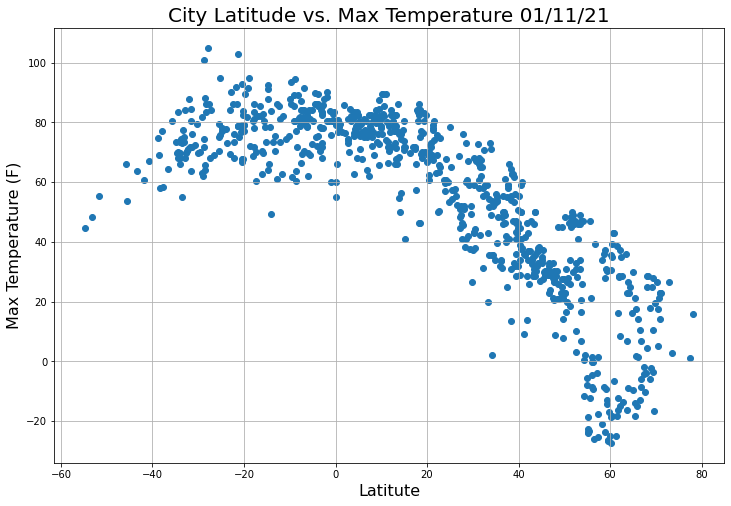

In [715]:
plt.subplots(figsize=(12,8))

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
plt.title('City Latitude vs. Max Temperature 01/11/21', fontsize=20)
plt.grid()
plt.xlabel('Latitute', fontsize=16)
plt.ylabel('Max Temperature (F)', fontsize=16)

In [716]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [717]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/11/21'

/Users/Admin/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


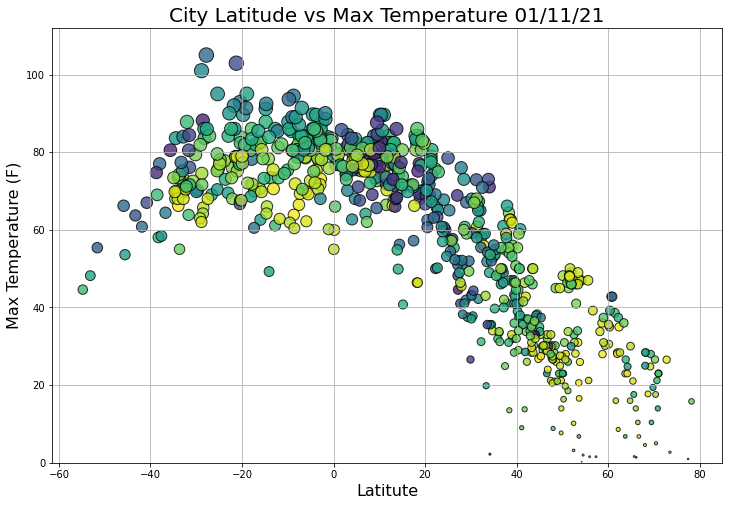

In [718]:
plt.subplots(figsize=(12,8))

#vcolor=[str(item/255.) for item in city_data_df['Max Temp']]


plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            linewidths=1,
            alpha=0.8,
            c=city_data_df['Humidity'],
            edgecolor='black',
            marker='o',
            s=city_data_df['Max Temp'] * 2,
            label='Cities')
plt.title(f'City Latitude vs Max Temperature {today}', fontsize=20)
plt.grid()
plt.xlabel('Latitute', fontsize=16)
plt.ylabel('Max Temperature (F)', fontsize=16)
plt.ylim(0,112)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

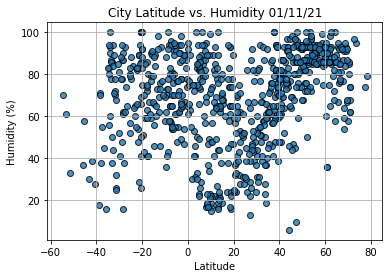

In [719]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

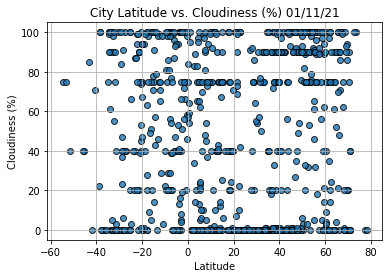

In [720]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

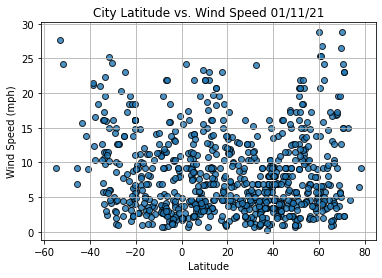

In [721]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [722]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [723]:
thirteeth = city_data_df.loc[13]
thirteeth

City                     Umarkhed
Country                        IN
Date          2021-01-11 19:44:41
Lat                          19.6
Lng                          77.7
Max Temp                     70.2
Humidity                       47
Cloudiness                     71
Wind Speed                   0.78
Name: 13, dtype: object

In [724]:
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jamestown,US,2021-01-11 19:44:40,42.0970,-79.2353,37.00,64,90,13.80
2,Sur,OM,2021-01-11 19:44:40,22.5667,59.5289,65.79,48,0,10.11
5,Qaqortoq,GL,2021-01-11 19:44:41,60.7167,-46.0333,42.80,36,75,25.32
7,Tasiilaq,GL,2021-01-11 19:44:41,65.6145,-37.6368,17.60,67,90,1.50
8,Dikson,RU,2021-01-11 19:44:41,73.5069,80.5464,2.73,95,100,4.52


In [725]:
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-01-11 19:42:19,-54.8000,-68.3000,44.6,70,75,9.22
3,Souillac,MU,2021-01-11 19:44:40,-20.5167,57.5167,77.0,100,75,16.11
4,Punta Arenas,CL,2021-01-11 19:43:27,-53.1500,-70.9167,48.2,61,75,27.63
6,Calvinia,ZA,2021-01-11 19:44:41,-31.4707,19.7760,76.1,32,3,6.06
12,Mahebourg,MU,2021-01-11 19:44:41,-20.4081,57.7000,77.0,100,75,16.11


# Scatterplots for Temperature

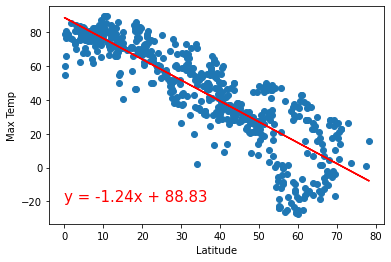

In [726]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))

In [727]:
linregress(x_values, y_values)
print(r_value)

0.46272537316970913


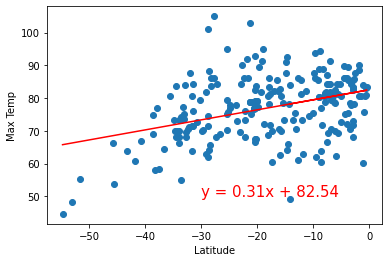

In [728]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
southern_regression = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,50))

In [729]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.3816493728408882


# Scatterplots for Humidity

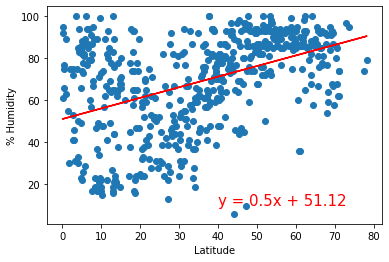

In [730]:
# Linear regression on humidity in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

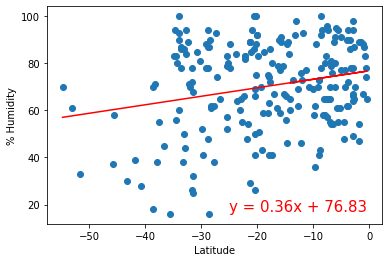

In [731]:
# Linear regression on humidity in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,17))

# Scatterplots for Cloudiness

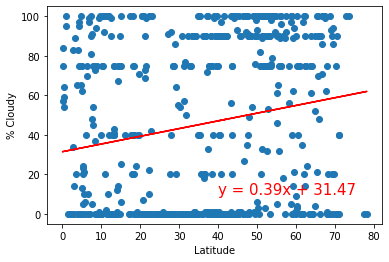

In [732]:
# Linear regression on cloudiness in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudy',(40,10))

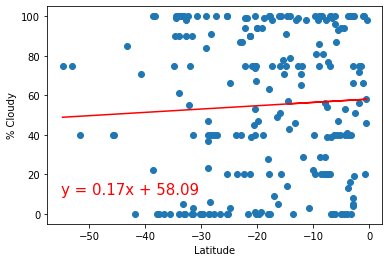

In [733]:
# Linear regression on cloudiness in the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudy',(-55,10))

# Scatterplots for Wind Speed

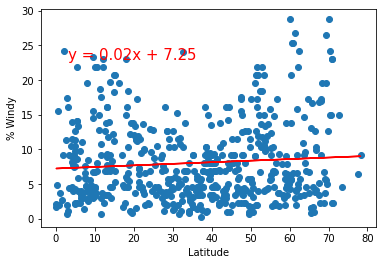

In [734]:
# Linear regression for wind speed in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Windiness', '% Windy',(3,23))

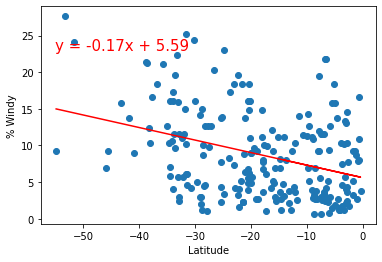

In [735]:
# Linear regression on wind speed in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Windy',(-55,23))